In [1]:
import os
import sys
import warnings
warnings.filterwarnings("ignore")
import scanpy as sc
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from TAST_GATE import TAST_GATE

Load Data

In [2]:
data='B1'
adata = sc.read(f'./Data/ST/{data}.h5ad')
adata

AnnData object with n_obs × n_vars = 295 × 15109
    obs: 'x', 'y', 'new_x', 'new_y', 'pixel_x', 'pixel_y', 'selected', 'label', 'OHE_labels'
    obsm: 'spatial'

Run TAST with a GATE. Can optionally input ground truth labels for parameter tuning, or input None to optimize RSI score. If we just require the reconstructed spatial domains, utilize consensus clustering with consensus = True. 

------Calculating spatial graph...
The graph contains 2526 edges, 295 cells.
8.5627 neighbors per cell on average.
Size of Input:  (295, 3000)


100%|██████████| 1000/1000 [07:26<00:00,  2.24it/s]


Running for Zetas: [0, 1, 0, 1]
Running for Zetas: [0, 1, 1, 1]
Running for Zetas: [0, 0, 1, 1]
Running for Zetas: [1, 1, 0, 1]
Running for Zetas: [1, 0, 1, 1]
Running for Zetas: [0, 0, 0, 1]
Running for Zetas: [1, 0, 0, 1]
Running for Zetas: [1, 1, 1, 1]


R[write to console]:                    __           __ 
   ____ ___  _____/ /_  _______/ /_
  / __ `__ \/ ___/ / / / / ___/ __/
 / / / / / / /__/ / /_/ (__  ) /_  
/_/ /_/ /_/\___/_/\__,_/____/\__/   version 6.0.1
Type 'citation("mclust")' for citing this R package in publications.

R[write to console]:                    __           __ 
   ____ ___  _____/ /_  _______/ /_
  / __ `__ \/ ___/ / / / / ___/ __/
 / / / / / / /__/ / /_/ (__  ) /_  
/_/ /_/ /_/\___/_/\__,_/____/\__/   version 6.0.1
Type 'citation("mclust")' for citing this R package in publications.

R[write to console]:                    __           __ 
   ____ ___  _____/ /_  _______/ /_
  / __ `__ \/ ___/ / / / / ___/ __/
 / / / / / / /__/ / /_/ (__  ) /_  
/_/ /_/ /_/\___/_/\__,_/____/\__/   version 6.0.1
Type 'citation("mclust")' for citing this R package in publications.

R[write to console]:                    __           __ 
   ____ ___  _____/ /_  _______/ /_
  / __ `__ \/ ___/ / / / / ___/ __/
 / / / / / / /__

fitting ...
  |                                                                      |   0%fitting ...
  |                                                                      |   0%fitting ...
fitting ...
  |                                                                      |   0%fitting ...
  |                                                                      |   0%fitting ...
  |                                                                      |   0%

R[write to console]:                    __           __ 
   ____ ___  _____/ /_  _______/ /_
  / __ `__ \/ ___/ / / / / ___/ __/
 / / / / / / /__/ / /_/ (__  ) /_  
/_/ /_/ /_/\___/_/\__,_/____/\__/   version 6.0.1
Type 'citation("mclust")' for citing this R package in publications.

R[write to console]:                    __           __ 
   ____ ___  _____/ /_  _______/ /_
  / __ `__ \/ ___/ / / / / ___/ __/
 / / / / / / /__/ / /_/ (__  ) /_  
/_/ /_/ /_/\___/_/\__,_/____/\__/   version 6.0.1
Type 'citation("mclust")' for citing this R package in publications.



fitting ...
  |                                                                      |   0%fitting ...
  |======================================================================| 100%
  |======================================================================| 100%
  |======================================================================| 100%
  |======================================================================| 100%
  |======================================================================| 100%
  |======================================================================| 100%
  |======================================================================| 100%
  |======================================================================| 100%


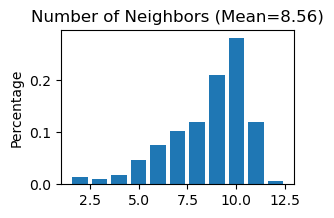

In [22]:
adata = TAST_GATE(adata = adata, consensus = False, n_clusters = 4, spatial_rad_cutoff = 2, ground_truth = None)

Visualization of Clusters

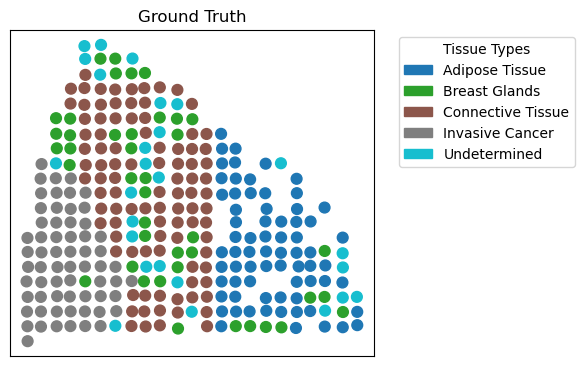

In [23]:
import matplotlib.patches as mpatches
label_mapping = {0: 'Adipose Tissue', 1: 'Breast Glands', 
                 2: 'Connective Tissue', 
                 3: 'Invasive Cancer', 4: 'Undetermined'}

x = adata.obs['new_x']
y = adata.obs['new_y']

# Create a figure
fig = plt.figure(figsize=(6, 6))

ax=plt.scatter(x, y, c=adata.obs['OHE_labels'], cmap='tab10', s=60)  
plt.title('Ground Truth')
plt.gca().invert_yaxis()  
plt.gca().set_aspect('equal', 'box')  
plt.xticks([]) 
plt.yticks([])  

legend_patches = [mpatches.Patch(color=ax.cmap(ax.norm(key)), label=label) 
                  for key, label in label_mapping.items()]
plt.legend(handles=legend_patches, bbox_to_anchor=(1.05, 1), loc='upper left', title="Tissue Types")

plt.tight_layout()
plt.show()

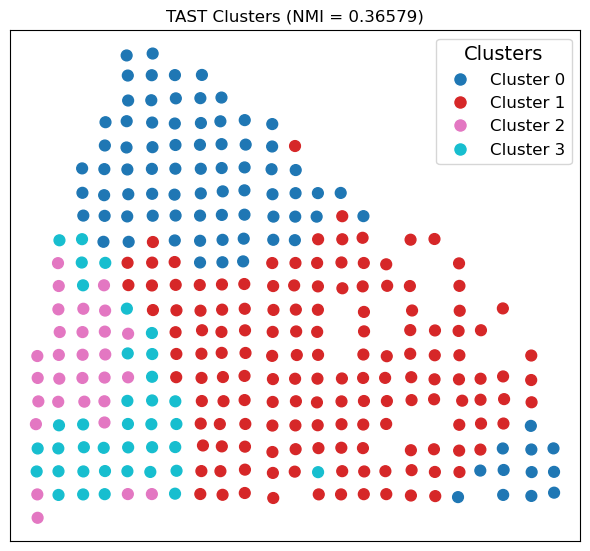

In [36]:
from sklearn.metrics.cluster import normalized_mutual_info_score
NMI = normalized_mutual_info_score(adata.obs['mclust'].values,  adata.obs['OHE_labels'].values)

x = adata.obs['new_x']
y = adata.obs['new_y']

adata.obs['mclust'] = adata.obs['mclust'].astype('category')
unique_clusters = np.unique(adata.obs['mclust'])
cmap = plt.cm.get_cmap('tab10', len(unique_clusters))

# Create a figure
fig = plt.figure(figsize=(6, 6))

plt.scatter(x, y, c=adata.obs['mclust'], cmap=cmap, s=60)  
plt.title('TAST Clusters (NMI = %.5f)'%NMI)
plt.gca().invert_yaxis()  
plt.gca().set_aspect('equal', 'box') 
plt.xticks([])  
plt.yticks([])  

handles = []
labels = []
for i, cluster in enumerate(unique_clusters):
    color = cmap(i)
    handles.append(plt.Line2D([0], [0], marker='o', color='w', markerfacecolor=color, markersize=10, linestyle='None'))
    labels.append(f'Cluster {int(cluster)}')
plt.legend(handles, labels, title='Clusters', fontsize=12, title_fontsize=14, loc='upper right')

plt.tight_layout()
plt.show()

We observe that TAST has segmented the invasive cancer region into two sub clusters, indicating some intratumoral heterogeneity. We may wish to explore the source of this heterogeneity. 

In [37]:
sc.pp.neighbors(adata, n_neighbors=8, use_rep="TAST")

2024-06-19 15:26:29.813391: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-06-19 15:26:32.345420: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: :
2024-06-19 15:26:32.345572: I tensorflow/compiler/xla/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.
2024-06-19 15:26:47.701837: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer.so.7'; dlerror: libnvinfer.so.7: cannot open shared object file: No such fil

In [38]:
adata.uns["iroot"] = np.flatnonzero(adata.obs["mclust"] == 0)[0]
sc.tl.dpt(adata)

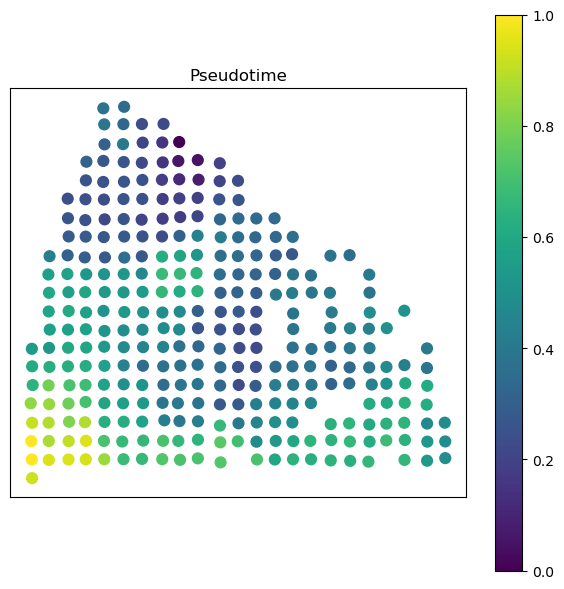

In [39]:
x = adata.obs['new_x']
y = adata.obs['new_y']

# Create a figure
fig = plt.figure(figsize=(6, 6))

plt.scatter(x, y, c=adata.obs['dpt_pseudotime'], cmap='viridis', s=60) 
plt.title('Pseudotime')
plt.gca().invert_yaxis()  
plt.gca().set_aspect('equal', 'box')  

plt.xticks([])  
plt.yticks([])  

plt.colorbar()

plt.tight_layout()
plt.show()

We might infer from the trajectory inference that Cluster 3 is a more developed cancer stage. We can study this further via differential gene expression and pathway enrichment analysis. 

In [52]:
adata.obs['mclust'] = adata.obs['mclust'].astype('category')
adata.obs['mclust'] = adata.obs['mclust'].cat.codes.astype(int)  
adata.obs['mclust'] = adata.obs['mclust'].astype(str) 

In [54]:
sc.tl.rank_genes_groups(adata, groupby='mclust', groups=['3'], reference='2', method='t-test')
dge = sc.get.rank_genes_groups_df(adata, group='3')
dge_filtered = dge[dge['pvals'] < 0.05]
gene_list = dge_filtered['names'].tolist()

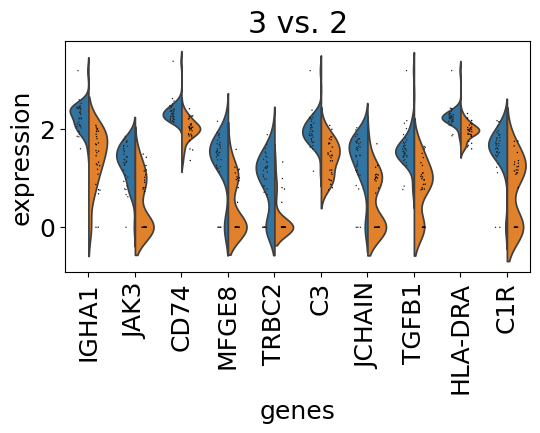

In [55]:
plt.rcParams["figure.figsize"] = (6, 3)
plt.rcParams['font.size'] = 18
sc.pl.rank_genes_groups_violin(adata, groups=['3'], n_genes=10)

We observe significant up-regulation of IGHA1, TRBC2, CD74, and HLA-DRA, which are associated with immune cells and immune response. Genes like TGFB1, MFGE8, and JAK3 are involved in tumor progression, cell proliferation, and immune evasion, which are critical in understanding the aggressiveness of the cancer.

In [58]:
import gseapy as gp
enr=gp.enrichr(gene_list=gene_list,  
               gene_sets=['MSigDB_Hallmark_2020'], 
               organism='human', 
               outdir=None,
               cutoff=0.05)

In [62]:
results = enr.results
significant_pathways = results[results['Adjusted P-value'] < 0.05]
significant_pathways = significant_pathways[significant_pathways['Combined Score'] > 50.0]
significant_pathways.shape

(9, 10)

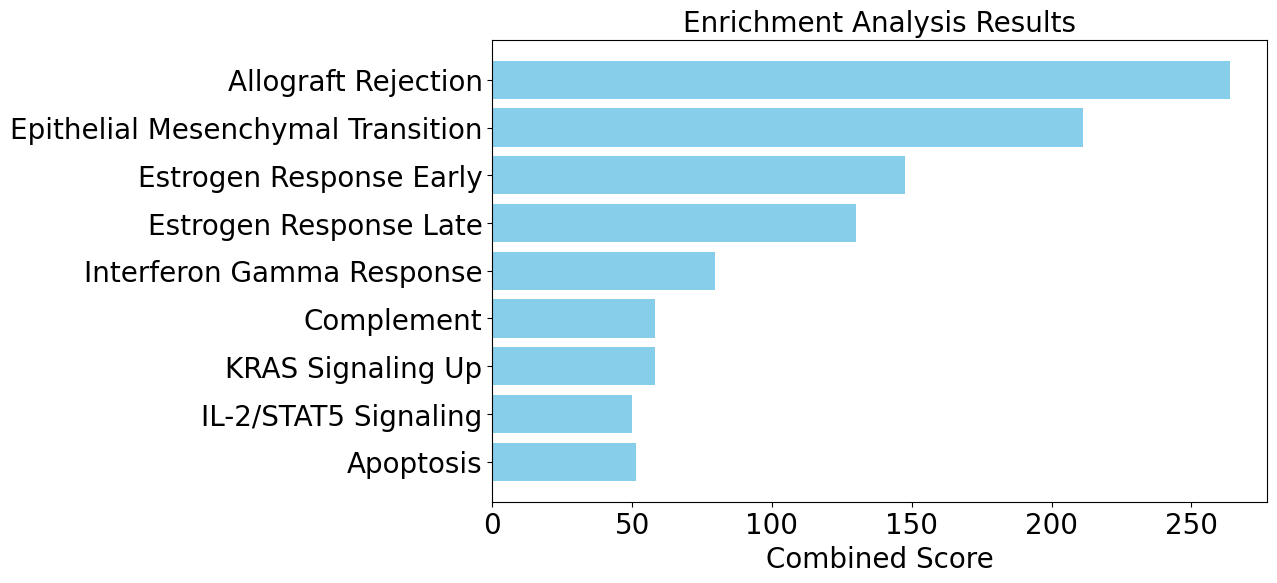

In [64]:
# Plotting
plt.figure(figsize=(10, 6))
plt.barh(significant_pathways['Term'], significant_pathways['Combined Score'], color='skyblue')
plt.xlabel('Combined Score', fontsize=20)
plt.xticks(fontsize=20)  
plt.yticks(fontsize=20)  
plt.title('Enrichment Analysis Results', fontsize=20)
plt.gca().invert_yaxis()  
plt.show()

We observe pathways most explicitly related to immune response and tumor aggresiveness. Allograft Rejection, Interferon Gamma Response, Complement, IL-2/STAT5 Signaling enrichment suggest a significant immune presence and activity within the tumor microenvironment. This could indicate ongoing immune surveillance and response efforts against the tumor, which is a common feature in advanced cancers.

Pathways like EMT and KRAS signaling are directly associated with tumor aggressiveness, invasiveness, and metastatic potential. Their upregulation points to the advanced and more dangerous phenotype of the tumor.